In [2]:
%matplotlib inline
import numpy as np
import rustworkx
from rustworkx.visualization import mpl_draw
from pprint import pprint
import pandas as pd
import numpy as np

In [2]:
board = np.zeros(shape=(3,3), dtype=np.int8)
board

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int8)

In [3]:
def check_user_won(p1, p2, data):
    all_equal = len(set(data)) == 1
    
    if(all_equal and data[0] == p1):
        return(True, "Player 1")
        
    elif(all_equal and data[0] == p2):
        return(True, "Player 2")

    return (False, None)
        
        
    
def check_status(p1, p2, board):    
    board_len = len(board)
    won = False
    who_won = None
    draw = False
    
    for row in board:
        won, who_won = check_user_won(p1, p2, row)
        if(won): return won, who_won, draw
    
    for column in range(board_len):
        column_data = [board[row][column] for row in range(board_len)]
        won, who_won = check_user_won(p1, p2, column_data)
        if(won): return won, who_won, draw

    main_diagonal = [board[i][i] for i in range(board_len)]
    won, who_won = check_user_won(p1, p2, main_diagonal)
    if(won): return won, who_won, draw
        
    second_diagonal = [board[i][board_len - i - 1] for i in range(board_len)]
    won, who_won = check_user_won(p1, p2, second_diagonal)    
    if(won): return won, who_won, draw

    total_filled_rows = sum([int(all(row)) for row in board])
    draw = total_filled_rows == board_len
    return won, who_won, draw

In [4]:
board[1][1] = 2
board[2][0] = 1
board[1][2] = 1
board[2][2] = 2
board[2][0] = 1
board[1][0] = 2
board[2][1] = 2
board

array([[0, 0, 0],
       [2, 2, 1],
       [1, 2, 2]], dtype=int8)

In [5]:
check_status(1, 2, board.tolist())

(False, None, False)

In [6]:
def show_board(board):
    pprint(board, width=30)
    
def play(player_1, player_2):
    board = np.zeros(shape=(3,3), dtype=np.int8)
    show_board(board.tolist())

    while(True):
        for player_id, player_number in enumerate([player_1, player_2]):
            player_x, player_y = (int(i) for i in input(f"Player {player_id+1} play: ").split())
            board[player_x][player_y] = player_number
            show_board(board.tolist())
            
            won, who_won, draw = check_status(player_1, player_2, board)
            if(won):
                print(f"{who_won} won!")
                return
            elif(draw):
                print("Draw")
                return

In [ ]:
play(1, 2)

```
1|2|3   
-----
4|5|6   
-----
7|8|9
```


combinations: $9!$ \
winning patterns: $({1,2,3}), ({4,5,6}), ({7,8,9}), ({1,4,7}), ({2,5,8}), ({3,6,9}), ({1,5,9}), ({3,5,7})$

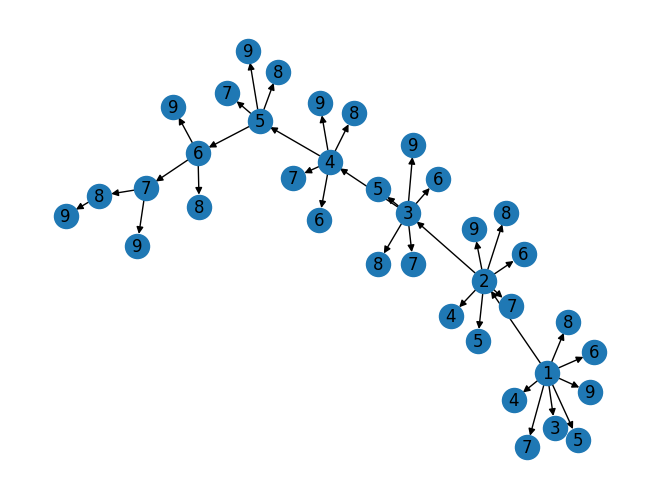

In [99]:
graph = rustworkx.PyDiGraph()
first_index = graph.add_node(1)

next_index = first_index
for i in range(1, 10):
    indexes = graph.add_nodes_from(list(range(i+1, 10)))
    if(len(indexes) == 0):
        break
    graph.add_edges_from([(next_index, ind, str(i)) for ind in indexes])
    next_index = indexes[0]

mpl_draw(graph, with_labels=True, labels=lambda x:x)